## Deicision Trees

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
print(iris.keys())
X = iris.data[:, 2:] # petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

what is the data look like? 

In [30]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

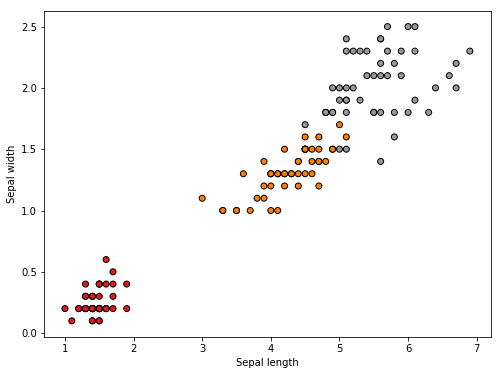

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure(2, figsize=(8, 6))
# plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width');

decision tree's don't require much data prep -- no need to scale values or anything like that

### Training and Visualizing Decision Trees

In [29]:
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file="iris_tree.dot",
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
)

#### CART - Classification and Regression Tree
the algo splits the training set into two subsets using a single feature `k` and threshold `t_k`. It searches for the pair that provides the "purest" subsets. Since it's searching, it should have a cost function right? 

We're trying to minimize:<br>
J(k, t_k) = (m_left / m) * G_left + (m_right / m) * G_right

where `m` is the number of instances in either subset and G is a measure of "inpurity" in the subset.

After splitting the subset into 2, it recursively splits the remaining subsets. It stops recursing once it reaches the `max_depth` or it can't find a split to reduce the impurity. 

This is a greedy algorithm -- which does not guarantee to converge to the correct optimal solution. Finding the optimal solution is an NP Complete problem -- it requires `O(epx(m))` time, making it intractable fairly small training sets. 

`P` is a set of problems that can be solved in polynomial time. `NP` is the set of problems whole solutions can be verified in polynomial time. `NP-Hard` problem is a problem to which any `NP Problem` can be deduced in polynomial time. An `NP-Complete` problem is both `NP` and `NP-Hard`